In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyddm
import os
import seaborn as sns

In [2]:
df_raw = pd.read_stata('Data_Exp1234_clean.dta')

In [3]:
df_raw.columns

Index(['confidence', 'correct', 'true_shock', 'ab_nominal', 'rt', 'endowment',
       'concentration', 'anxiety', 'totalmistakes', 'age',
       'difficulty_instructions', 'difficulty_remember_conditions',
       'regulation_q_1', 'regulation_q_2', 'regulation_q_3', 'regulation_q_4',
       'regulation_q_5', 'regulation_q_6', 'regulation_q_7', 'regulation_q_8',
       'regulation_q_9', 'regulation_q_10', 'count_dots', 'experiment', 'id',
       'trial', 'correct100', 'confcor', 'confcor100', 'avgcorrect', 'female',
       'gender_other', 'accbonus', 'stake', 'stake_nominal', 'difficult',
       'aligned', 'wishful', 'confusioncontrol', 'never_felt_deceived', 'bai',
       'dpessimism', 'idtreatmentblock'],
      dtype='object')

In [4]:
df_raw

,confidence,correct,true_shock,ab_nominal,rt,endowment,concentration,anxiety,totalmistakes,age,...,stake,stake_nominal,difficult,aligned,wishful,confusioncontrol,never_felt_deceived,bai,dpessimism,idtreatmentblock
0,0.60,1,1,20.00,4349.0,NaN,NaN,NaN,NaN,21.0,...,NaN,NaN,0.0,1.0,22.916664,NaN,5.0,1.190476,NaN,10.0
1,0.60,1,0,20.00,3796.0,NaN,NaN,NaN,NaN,21.0,...,NaN,NaN,1.0,0.0,22.916664,NaN,5.0,1.190476,NaN,10.0
2,0.65,0,0,20.00,2201.0,NaN,NaN,NaN,NaN,21.0,...,NaN,NaN,1.0,1.0,22.916664,NaN,5.0,1.190476,NaN,10.0
3,0.80,1,0,20.00,2945.0,NaN,NaN,NaN,NaN,21.0,...,NaN,NaN,0.0,0.0,22.916664,NaN,5.0,1.190476,NaN,10.0
4,0.70,0,0,20.00,3405.0,NaN,NaN,NaN,NaN,21.0,...,NaN,NaN,2.0,0.0,22.916664,NaN,5.0,1.190476,NaN,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97628,NaN,1,1,0.05,14534.5,0.0,4.0,0.0,3.0,48.0,...,0.0,0.0,0.0,NaN,-3.260872,0.0,4.0,1.857143,6.0,101133.0
97629,NaN,1,0,0.05,15099.3,0.0,4.0,0.0,3.0,48.0,...,0.0,0.0,0.0,NaN,-3.260872,0.0,4.0,1.857143,6.0,101133.0
97630,NaN,1,1,0.05,1715.6,0.0,4.0,0.0,3.0,48.0,...,0.0,0.0,2.0,NaN,-3.260872,0.0,4.0,1.857143,6.0,101133.0
97631,NaN,0,1,0.05,2599.6,0.0,4.0,0.0,3.0,48.0,...,0.0,0.0,3.0,NaN,-3.260872,0.0,4.0,1.857143,6.0,101133.0


In [5]:
df_raw.columns

Index(['confidence', 'correct', 'true_shock', 'ab_nominal', 'rt', 'endowment',
       'concentration', 'anxiety', 'totalmistakes', 'age',
       'difficulty_instructions', 'difficulty_remember_conditions',
       'regulation_q_1', 'regulation_q_2', 'regulation_q_3', 'regulation_q_4',
       'regulation_q_5', 'regulation_q_6', 'regulation_q_7', 'regulation_q_8',
       'regulation_q_9', 'regulation_q_10', 'count_dots', 'experiment', 'id',
       'trial', 'correct100', 'confcor', 'confcor100', 'avgcorrect', 'female',
       'gender_other', 'accbonus', 'stake', 'stake_nominal', 'difficult',
       'aligned', 'wishful', 'confusioncontrol', 'never_felt_deceived', 'bai',
       'dpessimism', 'idtreatmentblock'],
      dtype='object')

In [6]:
df_raw.count_dots

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
97628    1.0
97629    1.0
97630    1.0
97631    1.0
97632    1.0
Name: count_dots, Length: 97633, dtype: float64

In [7]:
columns_to_keep = [
    'id',              # Participant ID (for hierarchical fitting)
    'trial',           # Trial Number (for indexing/sequencing)
    'experiment',      # Filter column (must be 4)
    'rt',              # Response Time (The dependent variable distribution)
    'correct',         # Accuracy (The outcome predicted by DDM)
    'ab_nominal',      # Accuracy Bonus (Incentive condition)
    'stake_nominal',   # Loss Size (Incentive condition)
    'difficult'        # Task Difficulty (Signal quality condition)
]

In [8]:
df = df_raw[columns_to_keep]

In [9]:
df

,id,trial,experiment,rt,correct,ab_nominal,stake_nominal,difficult
0,1.0,1.0,1.0,4349.0,1,20.00,NaN,0.0
1,1.0,2.0,1.0,3796.0,1,20.00,NaN,1.0
2,1.0,3.0,1.0,2201.0,0,20.00,NaN,1.0
3,1.0,4.0,1.0,2945.0,1,20.00,NaN,0.0
4,1.0,5.0,1.0,3405.0,0,20.00,NaN,2.0
...,...,...,...,...,...,...,...,...
97628,1114.0,71.0,4.0,14534.5,1,0.05,0.0,0.0
97629,1114.0,72.0,4.0,15099.3,1,0.05,0.0,0.0
97630,1114.0,73.0,4.0,1715.6,1,0.05,0.0,2.0
97631,1114.0,74.0,4.0,2599.6,0,0.05,0.0,3.0


In [10]:
len(df[df['experiment']==4].id.unique())

407

In [11]:
v = {}
for x in df[df['experiment']==4].id.unique():
    try:
        participant_id = x
        n_trials = len(df[(df['experiment']==4) & (df['id']==x)])

        df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
        df_fit['rt_seconds'] = df_fit['rt'] / 1000.0
        
        model = pyddm.gddm(drift="driftrate", noise=1.0, bound="B", nondecision="ndtime", T_dur=8.0,
                    parameters={"driftrate": (-2, 2), "B": (.3, 2), "ndtime": (0, .5)})
        sample = pyddm.Sample.from_pandas_dataframe(df_fit, rt_column_name="rt_seconds", choice_column_name="correct")
        model.fit(sample, verbose=False)
        
        v[participant_id] = n_trials
        drift = model.parameters()['drift']
        bound = model.parameters()['bound']
        ndt = model.parameters()['overlay']['nondectime']

        v[participant_id] = [n_trials, drift, bound, ndt]

        print(f'Participant {x} has {n_trials} trials in Experiment 4.')
    except Exception as e:
        v[x] = 'N/A'
        print(f'Participant {x} could not be processed due to error: {e}')

/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
Info: Params [0.61706508 1.20924054 0.47980794] gave 19.89405958428972
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_n

Participant 708.0 has 93 trials in Experiment 4.


Info: Params [0.36394911 1.08563106 0.49984426] gave 17.136242267078366
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 709.0 has 88 trials in Experiment 4.


Info: Params [0.48321262 1.846047   0.49783795] gave 20.85014199094452
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 710.0 has 87 trials in Experiment 4.


Info: Params [0.41910017 1.6257073  0.47134205] gave 22.976736576349133
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 711.0 has 74 trials in Experiment 4.


Info: Params [0.62614216 1.23911233 0.49814467] gave 12.481702107867777
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 712.0 has 77 trials in Experiment 4.


Info: Params [0.16046617 1.23685395 0.4974483 ] gave 20.700090191838903
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 713.0 has 96 trials in Experiment 4.


Info: Params [0.29655468 1.74744214 0.49638474] gave 22.764878059226255
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 714.0 has 80 trials in Experiment 4.


Info: Params [1.53882932 1.67453171 0.49217279] gave 8.78520364146971
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 715.0 has 71 trials in Experiment 4.


Info: Params [0.31183823 1.35450553 0.49599736] gave 21.415993776021978
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 716.0 has 96 trials in Experiment 4.


Info: Params [1.03627425 1.86931579 0.43954955] gave 18.18565933811886
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 717.0 has 96 trials in Experiment 4.


Info: Params [0.82861253 0.9688798  0.49669345] gave 9.399198102279158
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 718.0 has 78 trials in Experiment 4.


Info: Params [2.         1.42521367 0.49536942] gave 2.2499658932521114
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 719.0 has 80 trials in Experiment 4.


Info: Params [0.77289636 0.98445724 0.49592271] gave 14.609320644613234
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 720.0 has 82 trials in Experiment 4.


Info: Params [0.14584344 1.23061806 0.49681771] gave 23.983632302650705
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 721.0 has 86 trials in Experiment 4.
Participant 722.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=17.299000)


Info: Params [0.22069664 1.92476469 0.49799492] gave 22.517040228843236
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 723.0 has 78 trials in Experiment 4.


Info: Params [0.71750061 1.42807604 0.49757234] gave 8.912774828935985
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 724.0 has 61 trials in Experiment 4.


Info: Params [0.38845859 1.05049916 0.49861109] gave 16.216173163580258
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 725.0 has 83 trials in Experiment 4.


Info: Params [0.45299896 1.83308349 0.49741151] gave 21.778247067011108
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 726.0 has 78 trials in Experiment 4.


Info: Params [1.36212439 2.         0.49815387] gave 3.9968304566101542
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 727.0 has 65 trials in Experiment 4.


Info: Params [2.         1.85529694 0.49604396] gave 10.207268884387418
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 728.0 has 96 trials in Experiment 4.


Info: Params [0.79608335 2.         0.46595594] gave 14.422666914214414
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 729.0 has 73 trials in Experiment 4.


Info: Params [0.92434543 1.70784689 0.49538112] gave 17.297982865593266
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 730.0 has 95 trials in Experiment 4.


Info: Params [0.59630458 2.         0.49986194] gave 25.25907761717084
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_n

Participant 731.0 has 91 trials in Experiment 4.
Participant 732.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=18.868800)


Info: Params [0.33231083 2.         0.13884236] gave 26.86498248367174
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_n

Participant 733.0 has 83 trials in Experiment 4.
Participant 734.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=8.035200)
Participant 735.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=20.289000)


Info: Params [0.40202962 1.07940305 0.49644331] gave 11.671756258939801
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 736.0 has 81 trials in Experiment 4.
Participant 737.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=26.031000)
Participant 738.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=23.641000)
Participant 739.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=29.428700)


Info: Params [0.60798477 2.         0.49611651] gave 20.500761744933634
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 740.0 has 84 trials in Experiment 4.


Info: Params [0.50365348 1.39614759 0.49514112] gave 20.031013784673235
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 741.0 has 96 trials in Experiment 4.


Info: Params [0.78784943 2.         0.49077161] gave 21.122041861093955
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 742.0 has 79 trials in Experiment 4.


Info: Params [0.4265339  2.         0.49507532] gave 28.33708465317507
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 743.0 has 82 trials in Experiment 4.


Info: Params [1.00045183 1.24629651 0.48942691] gave 13.764076521989017
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 744.0 has 86 trials in Experiment 4.
Participant 745.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=8.316100)


Info: Params [0.92218348 1.42816517 0.49534654] gave 9.944556928938477
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 746.0 has 69 trials in Experiment 4.


Info: Params [2.         1.78593555 0.49989195] gave 4.044101737057518
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_n

Participant 747.0 has 96 trials in Experiment 4.
Participant 748.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=13.111200)


Info: Params [0.48648235 1.2765332  0.49915569] gave 19.749620882759494
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 749.0 has 79 trials in Experiment 4.


Info: Params [1.10083676 1.50644626 0.49785656] gave 11.511177740265245
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 750.0 has 77 trials in Experiment 4.


Info: Params [0.64420835 1.15396905 0.49858865] gave 11.761953520387221
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 751.0 has 61 trials in Experiment 4.


Info: Params [1.32411084 1.27983188 0.49599285] gave 9.228344014426682
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 752.0 has 94 trials in Experiment 4.


Info: Params [0.39236622 1.58482423 0.48521556] gave 24.799886404268584
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 753.0 has 91 trials in Experiment 4.
Participant 754.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=13.252700)


Info: Params [-0.206473    1.18308026  0.49897069] gave 15.89444541234773
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 755.0 has 70 trials in Experiment 4.


Info: Params [0.7203798  1.90057456 0.49790883] gave 18.190482245126045
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 756.0 has 88 trials in Experiment 4.


Info: Params [0.25301351 1.61453407 0.49852674] gave 26.445299178482465
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 757.0 has 94 trials in Experiment 4.


Info: Params [0.73035756 1.09782117 0.49556872] gave 9.911554366875825
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_n

Participant 758.0 has 67 trials in Experiment 4.
Participant 759.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=11.898000)


Info: Params [0.635473   1.79056431 0.49774233] gave 15.610833541127072
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 760.0 has 82 trials in Experiment 4.


Info: Params [0.83455645 2.         0.48219365] gave 20.128964077839328
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 761.0 has 96 trials in Experiment 4.


Info: Params [1.22677139 1.38309156 0.49686109] gave 10.155318907907077
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 762.0 has 87 trials in Experiment 4.


Info: Params [0.38727138 1.70267388 0.49203724] gave 17.122876251485003
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 763.0 has 67 trials in Experiment 4.


Info: Params [0.80853748 2.         0.49623882] gave 20.236731973825787
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 764.0 has 90 trials in Experiment 4.


Info: Params [0.51328704 1.59416785 0.49142701] gave 24.66794769021057
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 765.0 has 93 trials in Experiment 4.


Info: Params [1.48085514 2.         0.49759184] gave 11.215916320287914
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 766.0 has 93 trials in Experiment 4.
Participant 767.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=10.629100)


Info: Params [2.         2.         0.49832578] gave 2.69805644122754
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 768.0 has 73 trials in Experiment 4.


Info: Params [0.84223698 1.81189752 0.49932413] gave 15.826743586948528
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 769.0 has 83 trials in Experiment 4.


Info: Params [0.79731654 2.         0.49938681] gave 11.797797464680736
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 770.0 has 82 trials in Experiment 4.
Participant 771.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=13.939000)
Participant 772.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=8.632100)
Participant 773.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=17.409700)
Participant 774.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=9.733000)


Info: Params [0.77374406 1.20359894 0.49990791] gave 15.463198256747013
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 775.0 has 96 trials in Experiment 4.


Info: Params [1.18341271 1.01887815 0.42712596] gave 9.567266955189538
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_n

Participant 776.0 has 95 trials in Experiment 4.
Participant 777.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=17.749100)


Info: Params [1.00644444 2.         0.49866614] gave 14.023641616679036
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 778.0 has 68 trials in Experiment 4.


Info: Params [0.17990568 1.72819135 0.49116657] gave 27.68411057237531
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 779.0 has 81 trials in Experiment 4.


Info: Params [0.66155294 1.43827519 0.49599537] gave 17.095178340582557
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 780.0 has 89 trials in Experiment 4.


Info: Params [0.59398175 1.64957614 0.49864435] gave 23.38927272789364
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 781.0 has 87 trials in Experiment 4.


Info: Params [0.34213785 1.49895494 0.49956653] gave 19.46588622849777
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 782.0 has 81 trials in Experiment 4.


Info: Params [0.61210502 1.74970689 0.49807971] gave 17.928389873521496
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 783.0 has 79 trials in Experiment 4.
Participant 784.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=9.150700)


Info: Params [1.01460548 1.96056431 0.49501998] gave 14.80170358319759
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 785.0 has 75 trials in Experiment 4.


Info: Params [0.93090724 1.10812182 0.49589716] gave 11.530998591943426
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 786.0 has 88 trials in Experiment 4.
Participant 787.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=27.180000)


Info: Params [1.41805641 1.03862605 0.49751997] gave 5.101107755883492
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_n

Participant 788.0 has 86 trials in Experiment 4.
Participant 789.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=9.167700)


Info: Params [0.81723736 2.         0.49759869] gave 19.937295803803845
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 790.0 has 81 trials in Experiment 4.


Info: Params [1.93577322 1.52133201 0.49591214] gave 3.1027244553556677
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 791.0 has 66 trials in Experiment 4.


Info: Params [0.36022851 2.         0.49083239] gave 31.15711610118762
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 792.0 has 93 trials in Experiment 4.


Info: Params [0.16223632 1.22639675 0.49893362] gave 20.394741075419205
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 793.0 has 87 trials in Experiment 4.
Participant 794.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=8.726700)
Participant 795.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=22.254100)


Info: Params [0.66055353 1.44228354 0.48537599] gave 13.846479489736986
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 796.0 has 69 trials in Experiment 4.
Participant 797.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=33.077900)


Info: Params [1.35494307 2.         0.49906637] gave 7.623987200562276
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_n

Participant 798.0 has 77 trials in Experiment 4.
Participant 799.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=17.417700)


Info: Params [0.8038241  1.78387481 0.49847757] gave 18.23782922807056
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_n

Participant 800.0 has 92 trials in Experiment 4.
Participant 801.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=19.467800)


Info: Params [1.24524835 2.         0.49663828] gave 11.355236164901598
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 802.0 has 88 trials in Experiment 4.


Info: Params [0.59081823 1.55741297 0.49531483] gave 17.09801826440362
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 803.0 has 88 trials in Experiment 4.


Info: Params [0.51807174 0.85169989 0.4626985 ] gave 10.934760114756415
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 804.0 has 92 trials in Experiment 4.
Participant 805.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=17.798000)


Info: Params [0.52426788 2.         0.49723172] gave 22.069380051530427
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 806.0 has 93 trials in Experiment 4.


Info: Params [1.00200739 2.         0.49418152] gave 14.913538795122118
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 807.0 has 86 trials in Experiment 4.


Info: Params [0.63283441 2.         0.49659205] gave 21.670747278325607
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 808.0 has 81 trials in Experiment 4.


Info: Params [0.6662547  1.61660289 0.49598631] gave 20.219631046301746
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 809.0 has 89 trials in Experiment 4.


Info: Params [1.0816352  1.26935643 0.49501506] gave 11.265300783981246
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 810.0 has 93 trials in Experiment 4.


Info: Params [1.17529118 1.26209223 0.49537589] gave 11.285619485774482
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 811.0 has 88 trials in Experiment 4.
Participant 812.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=10.973000)


Info: Params [0.30392324 1.61153717 0.49149137] gave 21.4948721576205
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 813.0 has 88 trials in Experiment 4.


Info: Params [0.89399698 1.84637071 0.49740067] gave 18.856236449573107
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 814.0 has 87 trials in Experiment 4.
Participant 815.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=15.112500)
Participant 816.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=14.276300)


Info: Params [0.87810947 1.54373588 0.49847482] gave 11.066834647626628
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 817.0 has 77 trials in Experiment 4.
Participant 818.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=12.381000)


Info: Params [2.         1.27149177 0.49559293] gave -1.5262783705297964
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 819.0 has 83 trials in Experiment 4.


Info: Params [1.03149311 2.         0.49976009] gave 14.171156606704423
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 820.0 has 81 trials in Experiment 4.
Participant 821.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=14.811800)


Info: Params [0.90960035 1.20326471 0.49546992] gave 12.707924525146822
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 822.0 has 95 trials in Experiment 4.


Info: Params [1.18797071 2.         0.49536855] gave 12.160431497370048
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 823.0 has 70 trials in Experiment 4.
Participant 824.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=8.533000)
Participant 825.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=18.899400)
Participant 826.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=10.431000)
Participant 827.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=13.984100)
Participant 828.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=8.612300)
Participant 829.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=8.733500)


Info: Params [1.50079501 1.9955591  0.49877407] gave 11.589223192708456
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 830.0 has 94 trials in Experiment 4.


Info: Params [0.94007928 1.60924912 0.49980302] gave 13.453611872803513
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 831.0 has 85 trials in Experiment 4.
Participant 832.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=10.347100)


Info: Params [0.3298214  0.96816465 0.49576504] gave 13.607931684954206
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 833.0 has 83 trials in Experiment 4.
Participant 834.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=11.037200)
Participant 835.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=10.250600)


Info: Params [1.31148214 2.         0.49652693] gave 10.951625239374502
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 836.0 has 82 trials in Experiment 4.


Info: Params [0.44751124 0.76076594 0.48130165] gave 11.629393865964019
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 837.0 has 90 trials in Experiment 4.


Info: Params [0.66985584 1.33267057 0.49794132] gave 14.847968373365376
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 838.0 has 82 trials in Experiment 4.


Info: Params [0.51588341 2.         0.30584603] gave 28.102825728829632
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 839.0 has 95 trials in Experiment 4.


Info: Params [0.58426075 2.         0.49570348] gave 24.87911664501403
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 840.0 has 88 trials in Experiment 4.


Info: Params [1.10062261 2.         0.49965097] gave 13.644812838282157
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 841.0 has 86 trials in Experiment 4.


Info: Params [0.80783504 1.43319422 0.49846091] gave 16.02950528435131
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 842.0 has 91 trials in Experiment 4.


Info: Params [1.47237023 2.         0.49532547] gave 15.162009315838038
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 843.0 has 90 trials in Experiment 4.
Participant 844.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=8.655000)


Info: Params [0.97089131 1.67312554 0.18475907] gave 8.753726207856856
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_n

Participant 845.0 has 62 trials in Experiment 4.
Participant 846.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=12.413300)


Info: Params [0.6257193  1.77704334 0.49696149] gave 22.143950885820214
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 847.0 has 96 trials in Experiment 4.
Participant 848.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=24.149400)


Info: Params [-0.00203457  0.98832388  0.49993183] gave 15.86618211757597
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 849.0 has 84 trials in Experiment 4.


Info: Params [0.52816782 1.05602384 0.49535944] gave 14.182587115181228
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 850.0 has 84 trials in Experiment 4.


Info: Params [0.77243115 1.2405742  0.49975055] gave 15.706508385177733
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 851.0 has 92 trials in Experiment 4.


Info: Params [0.82554258 1.31569944 0.46922111] gave 14.291708628457299
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 852.0 has 79 trials in Experiment 4.


Info: Params [1.27268846 2.         0.49686148] gave 9.35970669144312
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_no

Participant 853.0 has 78 trials in Experiment 4.
Participant 854.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=16.025100)
Participant 855.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=20.170155)
Participant 856.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=8.686000)
Participant 857.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=17.162200)


Info: Params [0.54285505 1.73391237 0.49749143] gave 19.11956003518471
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 858.0 has 72 trials in Experiment 4.


Info: Params [0.64559851 1.47956708 0.49655497] gave 20.478842692700482
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 859.0 has 96 trials in Experiment 4.
Participant 860.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=26.921100)


Info: Params [0.85240581 1.14798588 0.49879838] gave 11.846188517952646
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 861.0 has 85 trials in Experiment 4.
Participant 862.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=8.806800)


Info: Params [0.86924083 2.         0.49530162] gave 19.558933233345016
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 863.0 has 96 trials in Experiment 4.


Info: Params [0.7417054  1.09450809 0.44867291] gave 15.695558916715685
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 864.0 has 96 trials in Experiment 4.
Participant 865.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=24.011200)


Info: Params [0.41855392 1.61586269 0.4975097 ] gave 24.053033548577083
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 866.0 has 86 trials in Experiment 4.


Info: Params [0.82046491 2.         0.4962904 ] gave 14.122045878172724
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 867.0 has 79 trials in Experiment 4.


Info: Params [0.50224338 2.         0.49956213] gave 27.21585906601368
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 868.0 has 96 trials in Experiment 4.


Info: Params [0.88868684 2.         0.49526132] gave 12.941558535972542
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 869.0 has 80 trials in Experiment 4.
Participant 870.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=22.062900)


Info: Params [0.80770885 1.65278472 0.49032645] gave 19.378188566220118
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 871.0 has 90 trials in Experiment 4.


Info: Params [1.25739385 0.68907532 0.49694835] gave 1.6910629210947885
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 872.0 has 72 trials in Experiment 4.


Info: Params [0.82001907 1.67042885 0.49688541] gave 17.74434546228602
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_n

Participant 873.0 has 87 trials in Experiment 4.
Participant 874.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=15.780400)


Info: Params [0.67489105 1.58939375 0.49748388] gave 19.762662679960563
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 875.0 has 88 trials in Experiment 4.


Info: Params [0.50087513 1.59608843 0.49822683] gave 19.552470125922888
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 876.0 has 72 trials in Experiment 4.


Info: Params [0.15285771 1.88709717 0.49928163] gave 20.933592525360897
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 877.0 has 71 trials in Experiment 4.
Participant 878.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=20.503100)


Info: Params [0.7238234  2.         0.49684055] gave 19.87257527767136
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_n

Participant 879.0 has 70 trials in Experiment 4.
Participant 880.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=28.045500)


Info: Params [0.57655071 2.         0.49759268] gave 25.687094538598497
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 881.0 has 81 trials in Experiment 4.


Info: Params [0.81455497 2.         0.47736728] gave 17.946005398829424
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 882.0 has 86 trials in Experiment 4.


Info: Params [0.53662902 1.24809703 0.49825753] gave 17.81247593805579
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 883.0 has 96 trials in Experiment 4.


Info: Params [1.22140727 1.01500368 0.49552833] gave 6.220876580197062
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 884.0 has 58 trials in Experiment 4.


Info: Params [0.25441081 1.48108333 0.49624657] gave 25.411007595591364
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 885.0 has 89 trials in Experiment 4.


Info: Params [0.53061891 1.52535767 0.49666433] gave 21.39289636977219
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 886.0 has 81 trials in Experiment 4.


Info: Params [0.74783953 1.61404431 0.4973053 ] gave 12.839341934007228
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 887.0 has 77 trials in Experiment 4.


Info: Params [0.40542742 1.13004974 0.49687524] gave 15.568365218228259
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 888.0 has 82 trials in Experiment 4.
Participant 889.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=8.947000)


Info: Params [0.39149122 0.97222882 0.49746368] gave 15.768017675750631
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 890.0 has 81 trials in Experiment 4.


Info: Params [0.52557537 1.3469339  0.49894541] gave 18.810421513257616
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 891.0 has 85 trials in Experiment 4.


Info: Params [0.67655695 1.33798681 0.49692259] gave 18.207232880371777
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 892.0 has 95 trials in Experiment 4.


Info: Params [0.63983972 1.07216337 0.44375524] gave 18.315538975903845
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 893.0 has 93 trials in Experiment 4.


Info: Params [0.42419436 1.35505566 0.49865189] gave 22.537216130005113
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 894.0 has 90 trials in Experiment 4.


Info: Params [1.28077779 1.35223826 0.49589517] gave 10.207608285002358
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 895.0 has 96 trials in Experiment 4.
Participant 896.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=21.761000)


Info: Params [0.73819309 2.         0.49961985] gave 17.8221947472017
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 897.0 has 87 trials in Experiment 4.


Info: Params [0.55621903 1.14572279 0.49985066] gave 11.247803610379064
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 898.0 has 62 trials in Experiment 4.


Info: Params [0.5446496  1.22951231 0.49725676] gave 11.702371137808269
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 899.0 has 79 trials in Experiment 4.


Info: Params [0.64029233 1.49249899 0.00186615] gave 23.76552976867564
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_n

Participant 900.0 has 80 trials in Experiment 4.
Participant 901.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=19.580500)
Participant 902.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=8.609000)


Info: Params [1.16168934 1.91910774 0.49100042] gave 12.794392552801787
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 903.0 has 89 trials in Experiment 4.
Participant 904.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=20.774000)
Participant 905.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=25.132400)


Info: Params [1.04077875 2.         0.49760628] gave 15.160937183690056
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 906.0 has 89 trials in Experiment 4.


Info: Params [1.03304127 1.96545679 0.3520885 ] gave 14.672714823883977
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 907.0 has 80 trials in Experiment 4.
Participant 908.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=14.777300)
Participant 909.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=31.861000)


Info: Params [0.28709979 1.91059155 0.49776957] gave 23.709996504046565
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 910.0 has 88 trials in Experiment 4.
Participant 911.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=15.919400)
Participant 912.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=19.362400)
Participant 913.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=17.854900)


Info: Params [1.2255259  1.37314122 0.49583846] gave 10.94020420288722
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_n

Participant 914.0 has 96 trials in Experiment 4.
Participant 915.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=16.173900)
Participant 916.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=16.179000)


Info: Params [1.69810256 2.         0.4982779 ] gave 4.839161859563039
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_n

Participant 917.0 has 68 trials in Experiment 4.
Participant 918.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=34.759100)
Participant 919.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=17.886400)


Info: Params [0.64537994 1.6235186  0.49816538] gave 20.55381773334075
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 920.0 has 80 trials in Experiment 4.


Info: Params [0.12853956 1.37261109 0.49836079] gave 25.58289139762956
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_n

Participant 921.0 has 93 trials in Experiment 4.
Participant 922.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=9.383200)


Info: Params [0.12266573 1.81268826 0.498405  ] gave 26.111342196744374
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 923.0 has 83 trials in Experiment 4.


Info: Params [0.45575739 1.22760149 0.49960369] gave 10.634498690420548
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 924.0 has 79 trials in Experiment 4.


Info: Params [1.03388623 2.         0.49525488] gave 12.757536308954661
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 925.0 has 84 trials in Experiment 4.
Participant 926.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=14.848000)
Participant 927.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=25.572900)


Info: Params [1.07175196 2.         0.4943971 ] gave 10.747914071917464
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 928.0 has 65 trials in Experiment 4.


Info: Params [0.82968129 0.89684707 0.4956994 ] gave 9.026157989019694
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 929.0 has 81 trials in Experiment 4.


Info: Params [0.18475272 0.96329118 0.4971073 ] gave 16.8443381371779
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 930.0 has 96 trials in Experiment 4.


Info: Params [0.44740225 1.36404949 0.49902212] gave 18.46755582603117
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 931.0 has 83 trials in Experiment 4.


Info: Params [0.40378118 2.         0.49571684] gave 29.024626283299064
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 932.0 has 93 trials in Experiment 4.


Info: Params [0.27734788 1.58956364 0.49220893] gave 22.957647966405673
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 933.0 has 77 trials in Experiment 4.


Info: Params [0.57400979 1.90680954 0.4952846 ] gave 23.89460067125376
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 934.0 has 90 trials in Experiment 4.


Info: Params [0.90510604 1.40703238 0.49863341] gave 14.71841633072077
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 935.0 has 67 trials in Experiment 4.


Info: Params [0.53572577 1.52262231 0.49502746] gave 18.663844777683188
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 936.0 has 85 trials in Experiment 4.


Info: Params [0.51105454 2.         0.49919471] gave 26.945312390749613
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 937.0 has 94 trials in Experiment 4.
Participant 938.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=22.860800)
Participant 939.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=18.600900)
Participant 940.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=18.574300)


Info: Params [0.43451811 1.29972162 0.49716244] gave 18.757693007673957
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 941.0 has 68 trials in Experiment 4.
Participant 942.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=19.780900)
Participant 943.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=16.543100)


Info: Params [0.85226128 1.40648335 0.495327  ] gave 15.64765401783755
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 944.0 has 90 trials in Experiment 4.


Info: Params [0.81909022 1.37357117 0.49673461] gave 18.201545685095244
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 945.0 has 96 trials in Experiment 4.


Info: Params [0.51394063 1.99109904 0.4933505 ] gave 26.61685690857201
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_n

Participant 946.0 has 89 trials in Experiment 4.
Participant 947.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=19.160400)


Info: Params [0.83283056 2.         0.49420746] gave 16.06550314506743
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 948.0 has 91 trials in Experiment 4.


Info: Params [0.45629557 2.         0.4956277 ] gave 27.23793032805826
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 949.0 has 80 trials in Experiment 4.


Info: Params [0.27168886 1.23808726 0.49504005] gave 18.19130556402829
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 950.0 has 90 trials in Experiment 4.


Info: Params [0.53893084 1.03991129 0.49688463] gave 13.885603636926659
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 951.0 has 75 trials in Experiment 4.
Participant 952.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=22.557500)


Info: Params [0.58091569 1.08802325 0.49582938] gave 15.57542523460398
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 953.0 has 89 trials in Experiment 4.


Info: Params [1.94032228 1.54336968 0.49803827] gave 5.408217149794701
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 954.0 has 96 trials in Experiment 4.


Info: Params [0.69151737 1.55650601 0.37230209] gave 22.568817905652395
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 955.0 has 91 trials in Experiment 4.


Info: Params [0.31835291 1.49744357 0.49324818] gave 20.807321234548446
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 956.0 has 81 trials in Experiment 4.


Info: Params [0.3779886  1.64176774 0.49514681] gave 25.76617526680834
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 957.0 has 96 trials in Experiment 4.


Info: Params [0.44322172 1.50403644 0.49726182] gave 22.49678003681597
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 958.0 has 93 trials in Experiment 4.


Info: Params [0.28451269 1.30493962 0.4882787 ] gave 23.064139333140453
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 959.0 has 72 trials in Experiment 4.


Info: Params [0.81323144 1.32188235 0.49905655] gave 12.653592181197878
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 960.0 has 66 trials in Experiment 4.


Info: Params [0.74800715 1.85872339 0.49610781] gave 21.60805456165429
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_n

Participant 961.0 has 76 trials in Experiment 4.
Participant 962.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=17.745300)


Info: Params [0.65787365 1.13592866 0.49891352] gave 13.836256979148015
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 963.0 has 72 trials in Experiment 4.


Info: Params [1.18455913 1.69794911 0.4789946 ] gave 8.301447113375133
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_n

Participant 964.0 has 64 trials in Experiment 4.
Participant 965.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=10.984800)


Info: Params [0.59001804 1.3844943  0.39558663] gave 21.218353019323935
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 966.0 has 96 trials in Experiment 4.


Info: Params [0.48747575 2.         0.49735076] gave 20.97117371398954
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 967.0 has 66 trials in Experiment 4.


Info: Params [0.22394619 0.87453917 0.49861086] gave 12.710457835780282
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 968.0 has 90 trials in Experiment 4.


Info: Params [0.42904126 1.22781102 0.49814176] gave 18.674467849349544
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 969.0 has 82 trials in Experiment 4.
Participant 970.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=18.889700)


Info: Params [0.628591  1.8435406 0.4979008] gave 17.87270971485474
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 971.0 has 83 trials in Experiment 4.


Info: Params [1.25171832 1.0987789  0.49651578] gave 6.2261443760105415
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 972.0 has 84 trials in Experiment 4.
Participant 973.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=19.833100)


Info: Params [0.85991317 0.98318019 0.43947993] gave 12.431006671971112
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 974.0 has 90 trials in Experiment 4.


Info: Params [-0.21196178  0.53555582  0.41554845] gave 2.8506953491809734
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 975.0 has 83 trials in Experiment 4.


Info: Params [0.79257586 1.68636957 0.49551219] gave 16.28467257516739
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 976.0 has 63 trials in Experiment 4.


Info: Params [-0.00106679  1.01318649  0.49907186] gave 14.848015505708322
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 977.0 has 76 trials in Experiment 4.


Info: Params [0.67297148 1.59066042 0.49321942] gave 14.725073949413297
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 978.0 has 84 trials in Experiment 4.


Info: Params [0.75395676 1.74403367 0.48104904] gave 14.105447135366942
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 979.0 has 75 trials in Experiment 4.


Info: Params [1.13534421 1.16072679 0.49585258] gave 9.754639043686996
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 980.0 has 92 trials in Experiment 4.


Info: Params [1.07207887 1.36768497 0.49757917] gave 10.795149888158736
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 981.0 has 69 trials in Experiment 4.


Info: Params [0.61613573 1.126791   0.49896842] gave 14.471873941869182
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 982.0 has 90 trials in Experiment 4.
Participant 983.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=14.094700)
Participant 984.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=20.757400)


Info: Params [0.86928622 2.         0.49828213] gave 14.801428079946572
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 985.0 has 87 trials in Experiment 4.
Participant 986.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=10.476500)
Participant 987.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=22.384000)


Info: Params [1.43342195 1.14821111 0.49843113] gave 7.0928793394535905
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 988.0 has 89 trials in Experiment 4.


Info: Params [1.00817389 0.99554554 0.49907054] gave 9.41489872131103
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 989.0 has 96 trials in Experiment 4.


Info: Params [0.98587032 2.         0.49566457] gave 14.307676346688432
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 990.0 has 77 trials in Experiment 4.


Info: Params [1.09345253 1.43325561 0.49586883] gave 10.730991177510301
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 991.0 has 68 trials in Experiment 4.


Info: Params [0.7545182  1.8636052  0.49540354] gave 17.606879243041725
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 992.0 has 79 trials in Experiment 4.


Info: Params [0.48007763 2.         0.49510748] gave 28.546908540931938
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 993.0 has 93 trials in Experiment 4.
Participant 994.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=13.273800)
Participant 995.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=20.916000)


Info: Params [0.15868395 1.50363095 0.49573249] gave 21.758597423846055
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 996.0 has 78 trials in Experiment 4.


Info: Params [0.46386424 1.19987795 0.49235383] gave 13.507118975216752
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 997.0 has 64 trials in Experiment 4.
Participant 998.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=9.722900)


Info: Params [0.59610129 1.24042462 0.49842374] gave 15.583864817982054
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 999.0 has 90 trials in Experiment 4.
Participant 1000.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=15.558700)


Info: Params [0.84527385 1.83666564 0.49640271] gave 16.12499562881589
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_n

Participant 1001.0 has 80 trials in Experiment 4.
Participant 1002.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=17.975200)
Participant 1003.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=17.033300)
Participant 1004.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=27.341500)


Info: Params [0.58935469 1.06156385 0.4967764 ] gave 10.292628849897905
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 1005.0 has 77 trials in Experiment 4.
Participant 1006.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=24.462800)


Info: Params [0.9166035  1.92505274 0.28646069] gave 19.55743786326938
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_n

Participant 1007.0 has 71 trials in Experiment 4.
Participant 1008.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=12.343800)


Info: Params [0.60695248 1.06132207 0.49516881] gave 9.681845282271107
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_n

Participant 1009.0 has 75 trials in Experiment 4.
Participant 1010.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=9.467000)


Info: Params [0.74228015 2.         0.49742824] gave 23.352210044823334
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 1011.0 has 96 trials in Experiment 4.


Info: Params [1.5419091  1.66695568 0.49894553] gave 4.8223258898756445
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 1012.0 has 62 trials in Experiment 4.


Info: Params [0.80689705 1.7067018  0.49236351] gave 15.932671789030065
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 1013.0 has 89 trials in Experiment 4.


Info: Params [-0.23336604  0.73914419  0.49942946] gave 10.810878598666374
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 1014.0 has 96 trials in Experiment 4.


Info: Params [0.10838577 1.09583719 0.49863755] gave 15.431895663323878
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 1015.0 has 74 trials in Experiment 4.


Info: Params [0.14850231 1.23950736 0.499941  ] gave 20.300806667540037
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 1016.0 has 85 trials in Experiment 4.


Info: Params [0.43285756 1.57298468 0.49692741] gave 23.683722644622193
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 1017.0 has 86 trials in Experiment 4.
Participant 1018.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=32.364000)


Info: Params [1.65473019 2.         0.49917641] gave 5.810092839543137
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 1019.0 has 77 trials in Experiment 4.


Info: Params [0.76302691 1.3322585  0.49916607] gave 16.147850043100263
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 1020.0 has 95 trials in Experiment 4.
Participant 1021.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=16.287400)
Participant 1022.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=8.669900)


Info: Params [0.96498189 1.0227632  0.49625742] gave 5.2019049026106075
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 1023.0 has 72 trials in Experiment 4.
Participant 1024.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=29.027600)
Participant 1025.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=32.816700)
Participant 1026.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=8.777900)


Info: Params [1.37790439 2.         0.49685281] gave 10.020766916362168
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 1027.0 has 89 trials in Experiment 4.


Info: Params [0.58396642 1.91007346 0.49554888] gave 24.75146583976229
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 1028.0 has 96 trials in Experiment 4.


Info: Params [0.83634945 0.6228883  0.49899978] gave 1.6939318538036776
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 1029.0 has 65 trials in Experiment 4.


Info: Params [0.82782626 0.79705125 0.49649221] gave 7.246953182816286
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 1030.0 has 88 trials in Experiment 4.


Info: Params [1.37011926 1.37739474 0.47183018] gave 8.452834713399389
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 1031.0 has 71 trials in Experiment 4.


Info: Params [1.90238262 1.08477525 0.49729745] gave 1.9506112249197909
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 1032.0 has 78 trials in Experiment 4.
Participant 1033.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=21.235500)


Info: Params [0.57868127 1.05263017 0.49548267] gave 15.316988018133383
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 1034.0 has 88 trials in Experiment 4.


Info: Params [1.35629789 2.         0.49032632] gave 22.3116443197061
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 1035.0 has 81 trials in Experiment 4.


Info: Params [0.8641187  2.         0.37014074] gave 20.960569420840603
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 1036.0 has 95 trials in Experiment 4.


Info: Params [0.43228411 1.43126997 0.49741094] gave 15.129189506045451
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 1037.0 has 78 trials in Experiment 4.
Participant 1038.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=8.905600)


Info: Params [0.37126896 1.92758032 0.49688655] gave 27.33264317643852
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_n

Participant 1039.0 has 96 trials in Experiment 4.
Participant 1040.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=8.886100)
Participant 1041.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=16.077000)


Info: Params [0.55975094 1.41607135 0.23435103] gave 22.22904018643741
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 1042.0 has 96 trials in Experiment 4.


Info: Params [0.66218214 1.7411537  0.42297152] gave 16.509512866498643
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 1043.0 has 63 trials in Experiment 4.


Info: Params [0.83721033 1.24657423 0.49649443] gave 7.0873563105007555
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 1044.0 has 64 trials in Experiment 4.


Info: Params [0.87721973 2.         0.49752816] gave 16.725832410099784
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 1045.0 has 94 trials in Experiment 4.
Participant 1046.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=22.851100)
Participant 1047.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=11.639200)
Participant 1048.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=9.169200)


Info: Params [0.67200916 1.51856951 0.49763167] gave 19.420625439965654
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 1049.0 has 80 trials in Experiment 4.
Participant 1050.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=23.277400)
Participant 1051.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=19.750200)
Participant 1052.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=28.479000)


Info: Params [1.02393028 2.         0.48629077] gave 15.646802663351808
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 1053.0 has 91 trials in Experiment 4.
Participant 1054.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=18.086000)


Info: Params [0.78110875 0.87098186 0.49465266] gave 9.98293621106956
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 1055.0 has 70 trials in Experiment 4.


Info: Params [0.29479475 1.55858887 0.49513266] gave 21.88347743774386
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 1056.0 has 84 trials in Experiment 4.


Info: Params [0.5226039  1.20117757 0.34385474] gave 17.896407108548544
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 1057.0 has 90 trials in Experiment 4.


Info: Params [0.54429523 1.39701192 0.49878764] gave 14.835938699554227
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 1058.0 has 82 trials in Experiment 4.


Info: Params [0.7378144  2.         0.49503641] gave 18.067861773434988
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 1059.0 has 92 trials in Experiment 4.
Participant 1060.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=25.416300)
Participant 1061.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=10.215700)


Info: Params [0.62879359 1.43205288 0.49339452] gave 17.91862297015612
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_n

Participant 1062.0 has 87 trials in Experiment 4.
Participant 1063.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=16.099000)
Participant 1064.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=21.931600)
Participant 1065.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=17.203300)


Info: Params [0.70129611 2.         0.49533011] gave 13.392770074306478
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 1066.0 has 74 trials in Experiment 4.


Info: Params [0.71111534 1.40561136 0.49908293] gave 18.022955191130706
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 1067.0 has 96 trials in Experiment 4.


Info: Params [0.68556367 0.84394863 0.49591057] gave 11.142505319529189
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 1068.0 has 96 trials in Experiment 4.
Participant 1069.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=32.954500)
Participant 1070.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=8.099600)


Info: Params [0.43605989 0.94888877 0.49908186] gave 13.265398546643027
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 1071.0 has 96 trials in Experiment 4.


Info: Params [0.69635899 1.11660285 0.49502601] gave 12.593274030284412
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 1072.0 has 76 trials in Experiment 4.
Participant 1073.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=29.373300)


Info: Params [0.2209895  1.23220533 0.49784909] gave 15.240244500958921
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 1074.0 has 79 trials in Experiment 4.


Info: Params [0.79671628 1.64421578 0.49547165] gave 15.859963752177945
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 1075.0 has 80 trials in Experiment 4.


Info: Params [0.32731627 1.23666961 0.49760299] gave 20.49791930746133
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 1076.0 has 96 trials in Experiment 4.


Info: Params [0.52771721 1.59254861 0.49631588] gave 24.28859090362093
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 1077.0 has 96 trials in Experiment 4.


Info: Params [1.26771549 1.6059354  0.37306709] gave 13.361999585827961
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 1078.0 has 96 trials in Experiment 4.


Info: Params [0.73985942 1.22258093 0.49516963] gave 16.145949105043364
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 1079.0 has 96 trials in Experiment 4.


Info: Params [0.93232898 2.         0.29392328] gave 12.689985511100293
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 1080.0 has 85 trials in Experiment 4.


Info: Params [1.26128236 1.96415785 0.49644684] gave 14.240665673575096
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 1081.0 has 84 trials in Experiment 4.
Participant 1082.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=27.731000)


Info: Params [0.52019949 2.         0.4945133 ] gave 22.735974311755562
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 1083.0 has 84 trials in Experiment 4.


Info: Params [0.54792577 0.99937023 0.37048605] gave 16.287286849949897
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 1084.0 has 96 trials in Experiment 4.


Info: Params [1.22538435 2.         0.49551518] gave 13.938172184720793
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 1085.0 has 96 trials in Experiment 4.


Info: Params [0.26395568 1.61546424 0.49566265] gave 25.507647724669013
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 1086.0 has 96 trials in Experiment 4.
Participant 1087.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=26.433700)


Info: Params [1.04768127 0.98076741 0.4951299 ] gave 8.692110076565339
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_n

Participant 1088.0 has 94 trials in Experiment 4.
Participant 1089.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=14.263200)
Participant 1090.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=19.480300)
Participant 1091.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=9.384600)
Participant 1092.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=25.586800)
Participant 1093.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=8.664800)
Participant 1094.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=8.855800)


Info: Params [0.4851667  1.7040678  0.49682485] gave 25.799181410448075
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 1095.0 has 91 trials in Experiment 4.


Info: Params [0.36833456 1.0809948  0.49907227] gave 17.058958506330868
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 1096.0 has 96 trials in Experiment 4.


Info: Params [1.14106456 1.40651874 0.49806903] gave 12.488359901477263
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 1097.0 has 67 trials in Experiment 4.


Info: Params [0.72319753 0.83363148 0.49593892] gave 9.979289070168441
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 1098.0 has 78 trials in Experiment 4.


Info: Params [0.36921106 2.         0.49893977] gave 26.819700691733168
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 1099.0 has 94 trials in Experiment 4.
Participant 1100.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=21.032600)
Participant 1101.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=9.176600)


Info: Params [0.74568801 2.         0.49834465] gave 18.223917176103356
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 1102.0 has 76 trials in Experiment 4.
Participant 1103.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=8.345000)


Info: Params [1.04476599 1.81118527 0.4929017 ] gave 8.682794327094697
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 1104.0 has 75 trials in Experiment 4.


Info: Params [0.3985589  1.03359281 0.49503774] gave 15.420675892976895
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 1105.0 has 91 trials in Experiment 4.


Info: Params [0.97413094 0.91202595 0.49861505] gave 6.679572102248129
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 1106.0 has 78 trials in Experiment 4.


Info: Params [1.07777787 2.         0.49611671] gave 20.96810121449705
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 1107.0 has 94 trials in Experiment 4.


Info: Params [0.79613545 2.         0.49100891] gave 17.52427269909695
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


Participant 1108.0 has 82 trials in Experiment 4.


Info: Params [0.71272408 2.         0.49961641] gave 21.945883062185807
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_

Participant 1109.0 has 96 trials in Experiment 4.
Participant 1110.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=13.747200)


Info: Params [0.26284175 1.22203331 0.49150526] gave 18.07884630545533
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_n

Participant 1111.0 has 86 trials in Experiment 4.
Participant 1112.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=19.021200)


Info: Params [1.87844898 2.         0.4958577 ] gave 4.506040338285813


Participant 1113.0 has 84 trials in Experiment 4.
Participant 1114.0 could not be processed due to error: Simulation time T_dur=8.000000 not long enough for these data. (max sample RT=15.099300)


/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]
/var/folders/65/zt7m7_71489b2xgz9mqdpfl40000gn/T/ipykernel_32555/241270547.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fit = df[df['experiment']==4][df.id==x][df.ab_nominal==0.05][df.difficult==0]


In [12]:
v

{708.0: [93,
  {'drift': Fitted(0.6170650806528958, minval=-2, maxval=2)},
  {'B': Fitted(1.2092405371840993, minval=0.3, maxval=2)},
  Fitted(0.47980794455896564, minval=0, maxval=0.5)],
 709.0: [88,
  {'drift': Fitted(0.36394910764994276, minval=-2, maxval=2)},
  {'B': Fitted(1.0856310611393272, minval=0.3, maxval=2)},
  Fitted(0.49984426043138214, minval=0, maxval=0.5)],
 710.0: [87,
  {'drift': Fitted(0.48321261942906163, minval=-2, maxval=2)},
  {'B': Fitted(1.846046996116615, minval=0.3, maxval=2)},
  Fitted(0.4978379522133927, minval=0, maxval=0.5)],
 711.0: [74,
  {'drift': Fitted(0.4191001678847379, minval=-2, maxval=2)},
  {'B': Fitted(1.6257073039400107, minval=0.3, maxval=2)},
  Fitted(0.4713420534299555, minval=0, maxval=0.5)],
 712.0: [77,
  {'drift': Fitted(0.6261421638571723, minval=-2, maxval=2)},
  {'B': Fitted(1.2391123302330869, minval=0.3, maxval=2)},
  Fitted(0.49814467134035467, minval=0, maxval=0.5)],
 713.0: [96,
  {'drift': Fitted(0.16046616991200102, minval=-

In [13]:
v[708]

[93,
 {'drift': Fitted(0.6170650806528958, minval=-2, maxval=2)},
 {'B': Fitted(1.2092405371840993, minval=0.3, maxval=2)},
 Fitted(0.47980794455896564, minval=0, maxval=0.5)]

In [14]:
v[708][1]['drift'].real

0.6170650806528958

In [15]:
v.values()

dict_values([[93, {'drift': Fitted(0.6170650806528958, minval=-2, maxval=2)}, {'B': Fitted(1.2092405371840993, minval=0.3, maxval=2)}, Fitted(0.47980794455896564, minval=0, maxval=0.5)], [88, {'drift': Fitted(0.36394910764994276, minval=-2, maxval=2)}, {'B': Fitted(1.0856310611393272, minval=0.3, maxval=2)}, Fitted(0.49984426043138214, minval=0, maxval=0.5)], [87, {'drift': Fitted(0.48321261942906163, minval=-2, maxval=2)}, {'B': Fitted(1.846046996116615, minval=0.3, maxval=2)}, Fitted(0.4978379522133927, minval=0, maxval=0.5)], [74, {'drift': Fitted(0.4191001678847379, minval=-2, maxval=2)}, {'B': Fitted(1.6257073039400107, minval=0.3, maxval=2)}, Fitted(0.4713420534299555, minval=0, maxval=0.5)], [77, {'drift': Fitted(0.6261421638571723, minval=-2, maxval=2)}, {'B': Fitted(1.2391123302330869, minval=0.3, maxval=2)}, Fitted(0.49814467134035467, minval=0, maxval=0.5)], [96, {'drift': Fitted(0.16046616991200102, minval=-2, maxval=2)}, {'B': Fitted(1.2368539528426725, minval=0.3, maxval=

In [18]:
for x in v.values():
    try:
        print(x[3].real)
    except:
        print('N/A')

0.47980794455896564
0.49984426043138214
0.4978379522133927
0.4713420534299555
0.49814467134035467
0.49744830159559006
0.4963847429381651
0.4921727862385999
0.4959973644309637
0.4395495514064988
0.49669345351678923
0.4953694199350494
0.49592270670580496
0.49681771027393673
N/A
0.49799491730841655
0.49757234399072975
0.49861109438775525
0.4974115111551002
0.49815386714611704
0.49604396198969675
0.46595594113380484
0.4953811242954257
0.499861940651731
N/A
0.13884236241726222
N/A
N/A
0.496443306568859
N/A
N/A
N/A
0.49611651145961266
0.4951411153829754
0.4907716137426118
0.49507531888295103
0.489426912762593
N/A
0.49534653837240367
0.4998919543110431
N/A
0.49915569221861456
0.49785655757864933
0.4985886509541594
0.4959928523695905
0.48521555810444167
N/A
0.4989706909921659
0.49790883190915514
0.498526737003775
0.4955687224873831
N/A
0.49774233421651154
0.4821936489488273
0.4968610912220358
0.4920372446429033
0.4962388156038683
0.4914270115486156
0.49759183899865056
N/A
0.4983257811253081
0.

In [19]:
drifts = []
bounds = []
ndts = []

for x in v.values():
    try:
        drifts.append(x[1]['drift'].real)
    except (TypeError, KeyError, IndexError):
        drifts.append(np.nan)
    try:
        bounds.append(x[2]['B'].real)
    except (TypeError, KeyError, IndexError):
        bounds.append(np.nan)
    try:
        ndts.append(x[3].real)
    except (TypeError, KeyError, IndexError):
        ndts.append(np.nan)

data = np.column_stack([drifts, bounds, ndts])
df = pd.DataFrame(data, columns=['drift', 'B', 'ndt'])

In [20]:
df.isna().sum()

drift    136
B        136
ndt      136
dtype: int64

In [21]:
len(df)

407

In [22]:
df

,drift,B,ndt
0,0.617065,1.209241,0.479808
1,0.363949,1.085631,0.499844
2,0.483213,1.846047,0.497838
3,0.419100,1.625707,0.471342
4,0.626142,1.239112,0.498145
...,...,...,...
402,NaN,NaN,NaN
403,0.262842,1.222033,0.491505
404,NaN,NaN,NaN
405,1.878449,2.000000,0.495858


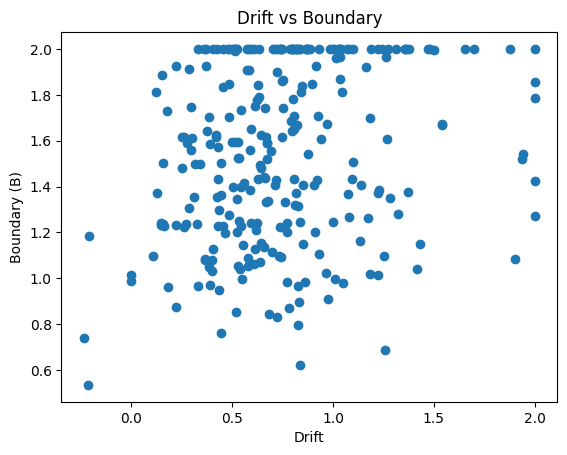

In [23]:
df_plot = df[['drift', 'B']].dropna()

plt.scatter(df_plot['drift'], df_plot['B'])
plt.xlabel('Drift')
plt.ylabel('Boundary (B)')
plt.title('Drift vs Boundary')
plt.show()


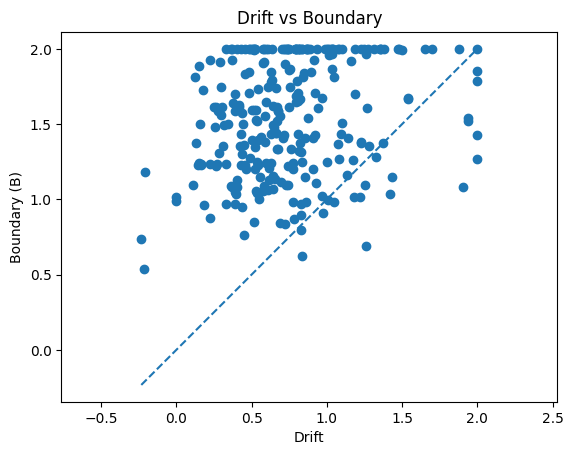

In [24]:
df_plot = df[['drift', 'B']].dropna()

plt.scatter(df_plot['drift'], df_plot['B'])
plt.xlabel('Drift')
plt.ylabel('Boundary (B)')
plt.title('Drift vs Boundary')

# Equal axis scaling
plt.axis('equal')

# Identity line
min_val = min(df_plot['drift'].min(), df_plot['B'].min())
max_val = max(df_plot['drift'].max(), df_plot['B'].max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--')

plt.show()


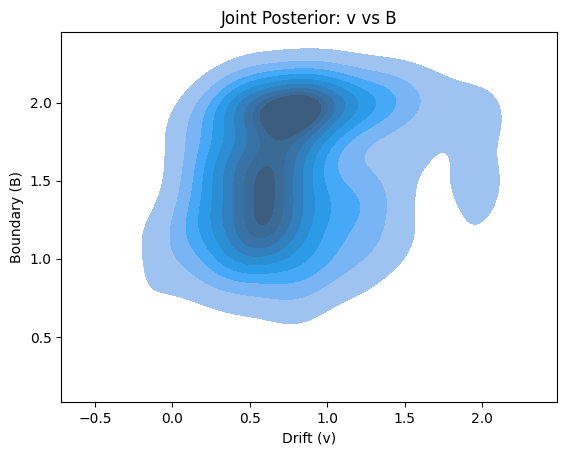

In [25]:
sns.kdeplot(
    x=df['drift'], 
    y=df['B'], 
    fill=True, 
    levels=10, 
    thresh=0.05
)

plt.xlabel("Drift (v)")
plt.ylabel("Boundary (B)")
plt.title("Joint Posterior: v vs B")
plt.show()


In [26]:
drifts = []
bounds = []
ndts = []

for x in v.values():
    try:
        drifts.append(x[1]['drift'].real)
        bounds.append(x[2]['B'].real)
        ndts.append(x[3]['overlay']['nondectime'].real)
    except TypeError:
        pass

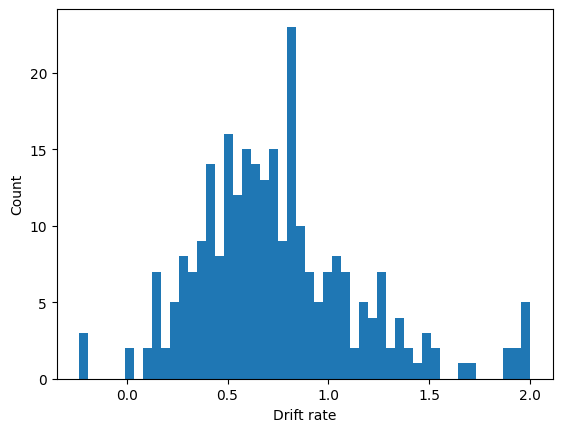

In [27]:
plt.hist(drifts, bins=50)
plt.xlabel("Drift rate")
plt.ylabel("Count")
plt.show()

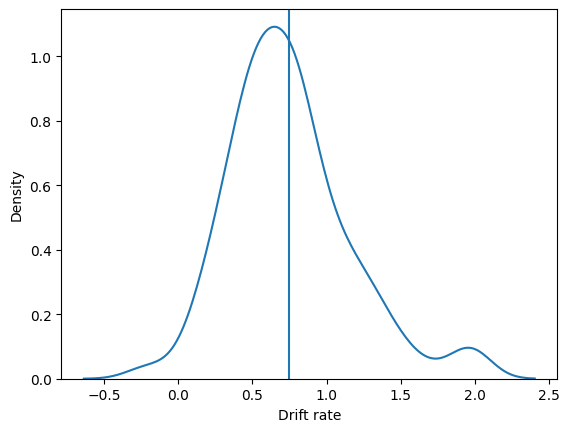

In [28]:
sns.kdeplot(drifts)
m = np.mean(drifts)
plt.axvline(m)
plt.xlabel("Drift rate")
plt.ylabel("Density")
plt.show()

### bound plots

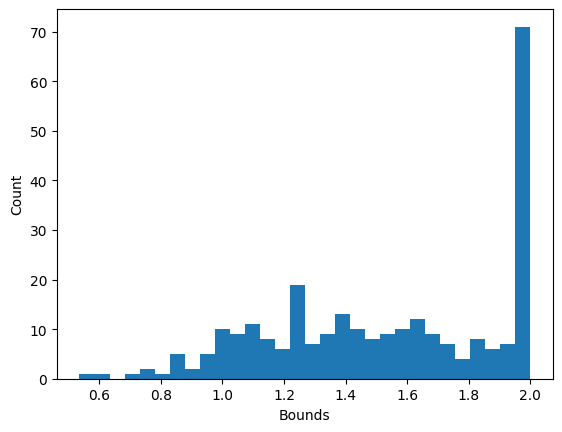

In [29]:
plt.hist(bounds, bins=30)
plt.xlabel("Bounds")
plt.ylabel("Count")
plt.show()

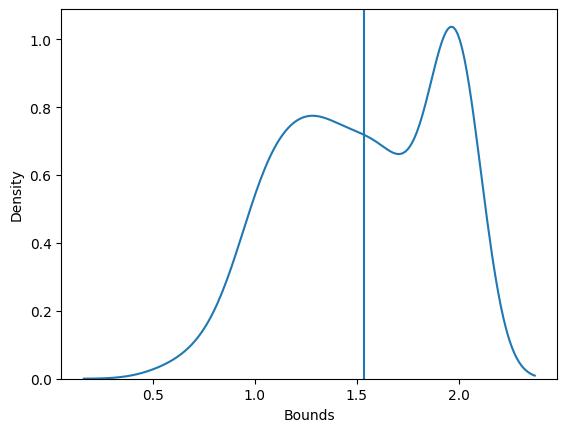

In [30]:
sns.kdeplot(bounds)
m_b = np.mean(bounds)
plt.axvline(m_b)
plt.xlabel("Bounds")
plt.ylabel("Density")
plt.show()

In [31]:
v

{708.0: [93,
  {'drift': Fitted(0.6170650806528958, minval=-2, maxval=2)},
  {'B': Fitted(1.2092405371840993, minval=0.3, maxval=2)},
  Fitted(0.47980794455896564, minval=0, maxval=0.5)],
 709.0: [88,
  {'drift': Fitted(0.36394910764994276, minval=-2, maxval=2)},
  {'B': Fitted(1.0856310611393272, minval=0.3, maxval=2)},
  Fitted(0.49984426043138214, minval=0, maxval=0.5)],
 710.0: [87,
  {'drift': Fitted(0.48321261942906163, minval=-2, maxval=2)},
  {'B': Fitted(1.846046996116615, minval=0.3, maxval=2)},
  Fitted(0.4978379522133927, minval=0, maxval=0.5)],
 711.0: [74,
  {'drift': Fitted(0.4191001678847379, minval=-2, maxval=2)},
  {'B': Fitted(1.6257073039400107, minval=0.3, maxval=2)},
  Fitted(0.4713420534299555, minval=0, maxval=0.5)],
 712.0: [77,
  {'drift': Fitted(0.6261421638571723, minval=-2, maxval=2)},
  {'B': Fitted(1.2391123302330869, minval=0.3, maxval=2)},
  Fitted(0.49814467134035467, minval=0, maxval=0.5)],
 713.0: [96,
  {'drift': Fitted(0.16046616991200102, minval=-

In [36]:
pd.DataFrame(v).to_csv('pyddm_fits_0412.csv')